In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
%matplotlib inline
plt.style.use('ggplot')
import plotly.offline as py
import plotly.graph_objs as go

In [2]:
zomato = pd.read_csv("Zomato.csv")

In [3]:
len(zomato)

51717

In [4]:
type(zomato)

pandas.core.frame.DataFrame

In [5]:
zomato.shape

(51717, 17)

In [6]:
zomato.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [7]:
z = zomato.copy()

In [8]:
z.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [9]:
z.describe(include = "all")

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
count,51717,51717,51717,51717,51717,43942,51717.000000,50509,51696,51490,23639,51672,51371,51717,51717,51717,51717
unique,51717,11495,8792,2,2,64,NaN,14926,93,93,5271,2723,70,22513,9098,7,30
top,https://www.zomato.com/bangalore/nolimmits-lou...,Delivery Only,Cafe Coffee Day,Yes,No,NEW,NaN,080 43334321,BTM,Quick Bites,Biryani,North Indian,300,[],[],Delivery,BTM
freq,1,128,96,30444,45268,2208,NaN,216,5124,19132,182,2913,7576,7595,39617,25942,3279
mean,NaN,NaN,NaN,NaN,NaN,NaN,283.697527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,803.838853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,41.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,198.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
z=zomato.drop(['url','address','phone'],axis=1)

In [11]:
z.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [12]:
z.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [13]:
z.describe(include=np.object)

,name,online_order,book_table,rate,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
count,51717,51717,51717,43942,51696,51490,23639,51672,51371,51717,51717,51717,51717
unique,8792,2,2,64,93,93,5271,2723,70,22513,9098,7,30
top,Cafe Coffee Day,Yes,No,NEW,BTM,Quick Bites,Biryani,North Indian,300,[],[],Delivery,BTM
freq,96,30444,45268,2208,5124,19132,182,2913,7576,7595,39617,25942,3279


In [14]:
z.corr(method ='kendall')

,votes
votes,1.0


In [15]:
z.rename(columns={'approx_cost(for two people)': 'average_cost', 
                         'listed_in(city)': 'locality',
                         'listed_in(type)': 'restaurant_type'}, inplace=True)

In [16]:
z.duplicated().sum()

63

In [17]:
z.drop_duplicates(inplace=True)

In [18]:
z.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,restaurant_type,locality
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [19]:
z.isnull().sum()

name                   0
online_order           0
book_table             0
rate                7760
votes                  0
location              21
rest_type            227
dish_liked         28027
cuisines              45
average_cost         345
reviews_list           0
menu_item              0
restaurant_type        0
locality               0
dtype: int64

In [20]:
z.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51654 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             51654 non-null  object
 1   online_order     51654 non-null  object
 2   book_table       51654 non-null  object
 3   rate             43894 non-null  object
 4   votes            51654 non-null  int64 
 5   location         51633 non-null  object
 6   rest_type        51427 non-null  object
 7   dish_liked       23627 non-null  object
 8   cuisines         51609 non-null  object
 9   average_cost     51309 non-null  object
 10  reviews_list     51654 non-null  object
 11  menu_item        51654 non-null  object
 12  restaurant_type  51654 non-null  object
 13  locality         51654 non-null  object
dtypes: int64(1), object(13)
memory usage: 5.9+ MB


In [21]:
z.restaurant_type.unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [22]:
z.locality.unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [23]:
z.rest_type.unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
      

In [24]:
z.average_cost.unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [25]:
#Some Transformations
z['average_cost'] = z['average_cost'].astype(str)
z['average_cost'] = z['average_cost'].apply(lambda x: x.replace(',',''))
z['average_cost'] = z['average_cost'].astype(float)

In [26]:
z.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51654 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             51654 non-null  object 
 1   online_order     51654 non-null  object 
 2   book_table       51654 non-null  object 
 3   rate             43894 non-null  object 
 4   votes            51654 non-null  int64  
 5   location         51633 non-null  object 
 6   rest_type        51427 non-null  object 
 7   dish_liked       23627 non-null  object 
 8   cuisines         51609 non-null  object 
 9   average_cost     51309 non-null  float64
 10  reviews_list     51654 non-null  object 
 11  menu_item        51654 non-null  object 
 12  restaurant_type  51654 non-null  object 
 13  locality         51654 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 5.9+ MB


In [27]:
z.average_cost.unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700.,   nan, 1400.,  180., 1350.,
       2200., 2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800.,
       3400.,   40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,
        469.,   70., 3200.,   60.,  560.,  240.,  360., 6000., 1050.,
       2300., 4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [28]:
z['name'].value_counts()[:20]

Cafe Coffee Day      96
Onesta               85
Just Bake            73
Empire Restaurant    71
Five Star Chicken    70
Kanti Sweets         68
Petoo                66
Polar Bear           65
Baskin Robbins       64
Chef Baker's         62
Pizza Hut            62
Domino's Pizza       60
Sweet Truth          60
KFC                  60
Subway               60
Beijing Bites        60
McDonald's           59
Smoor                59
Chai Point           58
Faasos               57
Name: name, dtype: int64

In [29]:
z['rate'].value_counts()[:20]

NEW       2198
3.9/5     2096
3.8/5     2020
3.7/5     2011
3.9 /5    1872
3.8 /5    1850
3.7 /5    1806
3.6/5     1769
4.0/5     1608
4.0 /5    1574
3.6 /5    1543
4.1 /5    1473
4.1/5     1472
3.5/5     1430
3.5 /5    1352
3.4/5     1256
3.4 /5    1217
4.2 /5    1164
3.3/5     1163
3.3 /5    1142
Name: rate, dtype: int64

In [30]:
z.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [31]:
z.rate = z.rate.replace("NEW", np.nan)
z.dropna(how ='any', inplace = True)

In [32]:
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
z.rate = z.rate.apply(remove_slash).str.strip().astype('float')

In [33]:
z.rate.unique()

array([4.1, 3.8, 3.7, 4.6, 4. , 4.2, 3.9, 3. , 3.6, 2.8, 4.4, 3.1, 4.3,
       2.6, 3.3, 3.5, 3.2, 4.5, 2.5, 2.9, 3.4, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [34]:
z.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,restaurant_type,locality
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [35]:
z['rate'].value_counts()

3.9    3246
4.0    2902
4.1    2827
3.8    2483
4.2    2124
4.3    1680
3.7    1646
4.4    1142
3.6     878
4.5     648
3.5     482
3.4     351
2.8     321
2.9     313
3.1     307
4.6     300
3.0     291
3.2     250
3.3     219
2.7     190
4.7     167
2.6     138
4.8      66
2.5      57
4.9      55
2.4      54
2.3      45
2.2      26
2.1      24
2.0      11
1.8       5
Name: rate, dtype: int64

In [36]:
z.isnull().sum()

name               0
online_order       0
book_table         0
rate               0
votes              0
location           0
rest_type          0
dish_liked         0
cuisines           0
average_cost       0
reviews_list       0
menu_item          0
restaurant_type    0
locality           0
dtype: int64

In [37]:
z.average_cost.unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        750.,  200.,  850., 1200.,  150.,  350.,  250., 1500., 1300.,
       1000.,  100.,  900., 1100., 1600.,  950.,  230., 1700., 1350.,
       2200., 1400., 2000., 1800., 1900.,  180.,  330., 2500., 2100.,
       3000., 2800., 3400.,   40., 1250., 3500., 4000., 2400., 1450.,
       3200., 6000., 1050., 4100., 2300.,  120., 2600., 5000., 3700.,
       1650., 2700., 4500.])

Get Correlation between different variables

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'average_cost', 'reviews_list',
       'menu_item', 'restaurant_type', 'locality'],
      dtype='object')

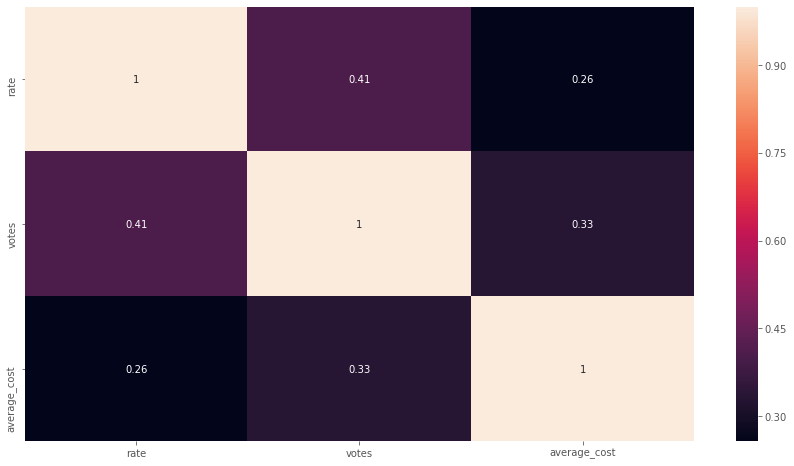

In [38]:
#Get Correlation between different variables
corr = z.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
z.columns

Encoding

In [39]:
def Encode(z):
    for column in z.columns[~z.columns.isin(['rate', 'average_cost', 'votes'])]:
        z[column] = z[column].factorize()[0]
    return z

z_en = Encode(z.copy())

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'average_cost', 'reviews_list',
       'menu_item', 'restaurant_type', 'locality'],
      dtype='object')

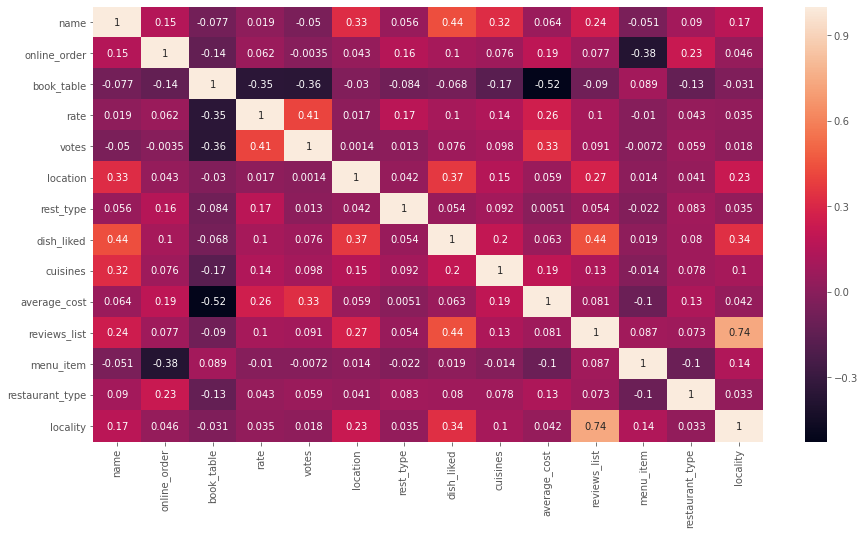

In [40]:
#Get Correlation between different variables
corr = z_en.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
z_en.columns

In [41]:
z.shape

(23248, 14)

Text(0.5, 1.0, 'Type of Service')

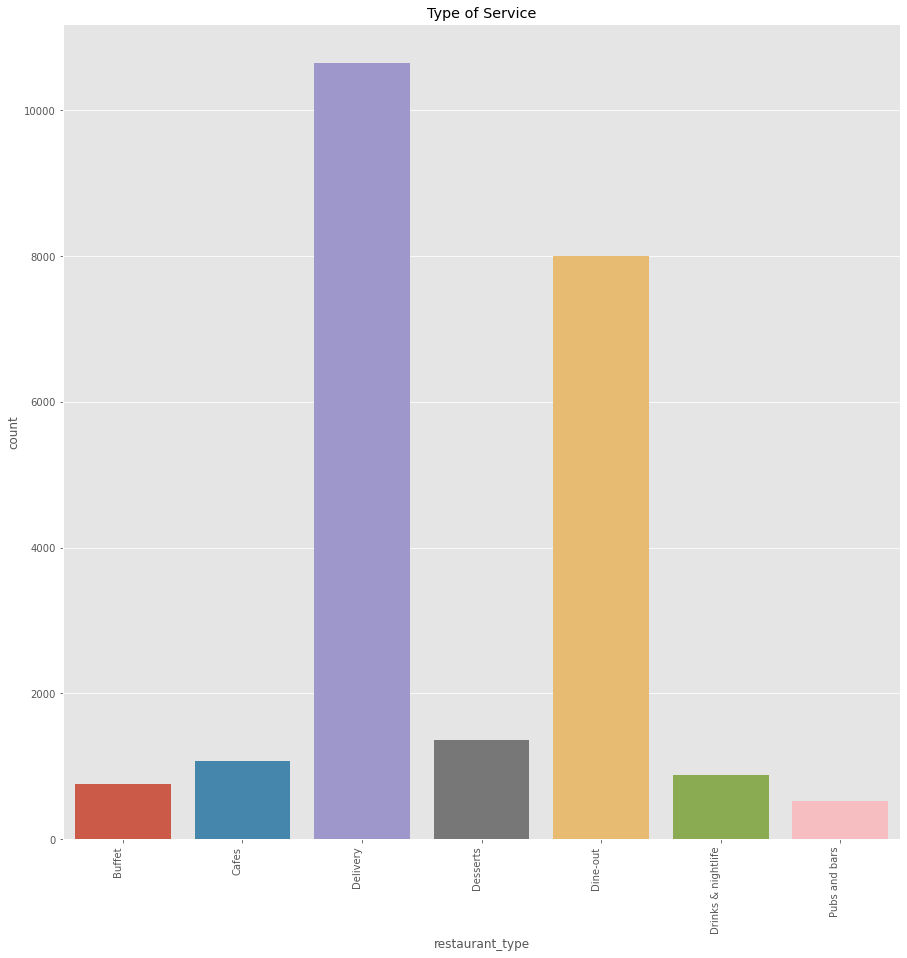

In [42]:
#Types of Services
sns.countplot(z['restaurant_type'])
sns.countplot(z['restaurant_type']).set_xticklabels(sns.countplot(z['restaurant_type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Type of Service')

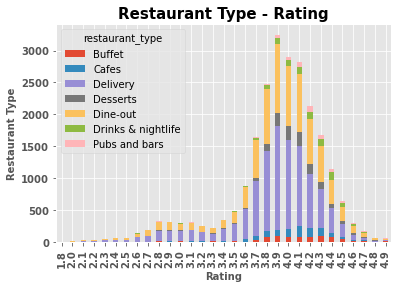

In [43]:
#Type and Rating
type_plt=pd.crosstab(z['rate'],z['restaurant_type'])
type_plt.plot(kind='bar',stacked=True);
plt.title('Restaurant Type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Restaurant Type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');

Text(0.5, 1.0, 'Cost of Restuarant')

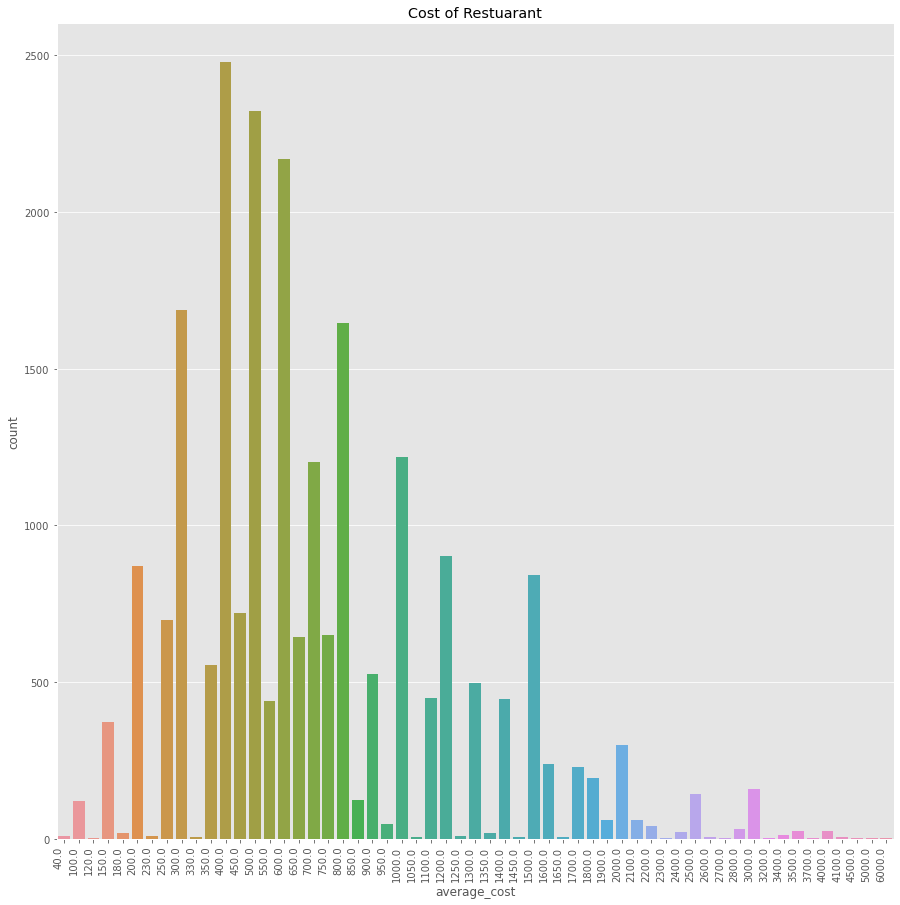

In [44]:
#Cost of Restuarant
sns.countplot(z['average_cost'])
sns.countplot(z['average_cost']).set_xticklabels(sns.countplot(z['average_cost']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Cost of Restuarant')

Text(0.5, 1.0, 'NO. of restaurants in a Location')

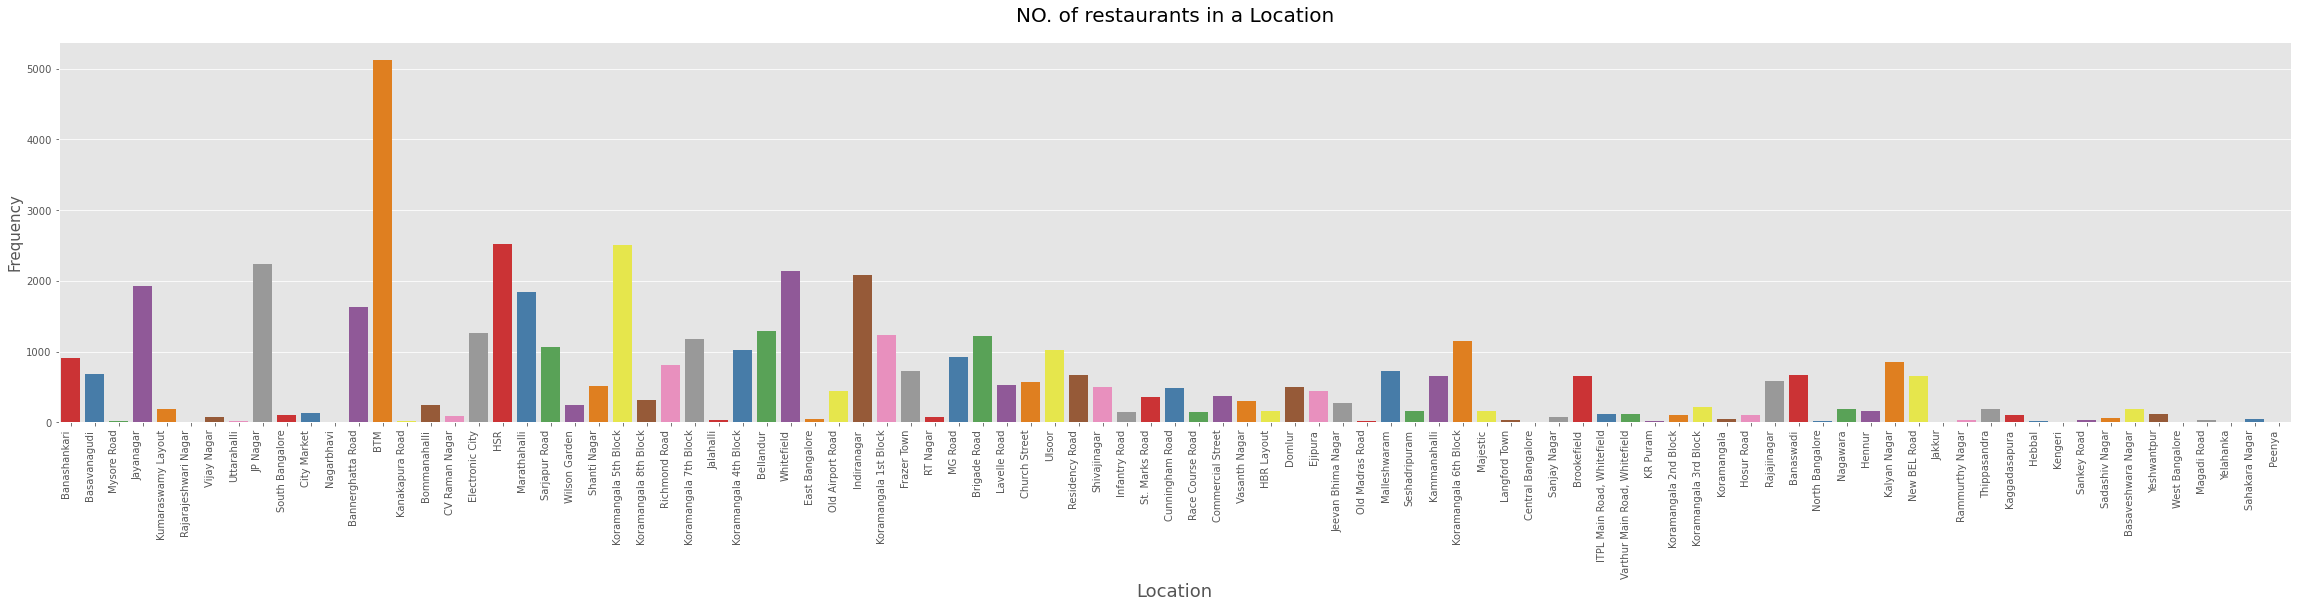

In [45]:
#NO. of restaurants in a Location',
fig = plt.figure(figsize=(40,7))
loc = sns.countplot(x="location",data=zomato, palette = "Set1")
loc.set_xticklabels(loc.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Location",size=18)
loc
plt.title('NO. of restaurants in a Location',size = 20,pad=20)

In [46]:
z.isnull().sum()

name               0
online_order       0
book_table         0
rate               0
votes              0
location           0
rest_type          0
dish_liked         0
cuisines           0
average_cost       0
reviews_list       0
menu_item          0
restaurant_type    0
locality           0
dtype: int64

In [47]:
z.to_csv('z1.csv', index=False)

In [48]:
pwd()

'C:\\Users\\h19baman\\zomato'

In [49]:
z

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,restaurant_type,locality
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51705,Izakaya Gastro Pub,Yes,Yes,3.8,128,Whitefield,"Bar, Casual Dining","Beer, Chicken Guntur, Paneer Tikka, Fish, Nood...","North Indian, Continental, Mediterranean",1200.0,"[('Rated 3.0', ""RATED\n Nice place to hangout...",[],Pubs and bars,Whitefield
51707,M Bar - Bengaluru Marriott Hotel Whitefield,No,No,3.9,77,Whitefield,"Fine Dining, Bar",Rooftop Ambience,Finger Food,2000.0,"[('Rated 4.0', 'RATED\n Went there post dinne...",[],Pubs and bars,Whitefield
51708,Keys Cafe - Keys Hotel,No,No,2.8,161,Whitefield,"Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian",1200.0,"[('Rated 3.0', 'RATED\n Place is good not tha...",[],Pubs and bars,Whitefield
51711,Bhagini,No,No,2.5,81,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800.0,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield


In [50]:
str(z['cuisines']).split(', ')

['0                     North Indian',
 'Mughlai',
 'Chinese\n1                        Chinese',
 'North Indian',
 'Thai\n2                             Cafe',
 'Mexican',
 'Italian\n3                         South Indian',
 'North Indian\n4                           North Indian',
 'Rajasthani\n                            ...                     \n51705       North Indian',
 'Continental',
 'Mediterranean\n51707                                    Finger Food\n51708             Chinese',
 'Continental',
 'North Indian\n51711    Andhra',
 'South Indian',
 'Chinese',
 'North Indian\n51715                                    Finger Food\nName: cuisines',
 'Length: 23248',
 'dtype: object']

In [51]:
z.reset_index(drop=True,inplace=True)

In [52]:
z.head(10)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,restaurant_type,locality
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,Timepass Dinner,Yes,No,3.8,286,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600.0,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
6,Onesta,Yes,Yes,4.6,2556,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600.0,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari
7,Penthouse Cafe,Yes,No,4.0,324,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700.0,"[('Rated 3.0', ""RATED\n I had been to this pl...",[],Cafes,Banashankari
8,Smacznego,Yes,No,4.2,504,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550.0,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari
9,CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...,Yes,No,4.1,402,Banashankari,Cafe,"Waffles, Pasta, Crispy Chicken, Honey Chilli C...",Cafe,500.0,"[('Rated 4.0', 'RATED\n We ended up here on a...",[],Cafes,Banashankari


In [53]:
splist = []
cuisine = []
for i in range(0, z['cuisines'].count()):
    splist = str(z['cuisines'][i]).split(', ')
    for item in splist:
        if item not in cuisine:
            cuisine.append(item)
cuisine

['North Indian',
 'Mughlai',
 'Chinese',
 'Thai',
 'Cafe',
 'Mexican',
 'Italian',
 'South Indian',
 'Rajasthani',
 'Pizza',
 'Continental',
 'Momos',
 'Beverages',
 'Fast Food',
 'American',
 'French',
 'European',
 'Burger',
 'Biryani',
 'Street Food',
 'Rolls',
 'Ice Cream',
 'Desserts',
 'Andhra',
 'Healthy Food',
 'Salad',
 'Asian',
 'Korean',
 'Indonesian',
 'Japanese',
 'Goan',
 'Seafood',
 'Kebab',
 'Steak',
 'Sandwich',
 'Bakery',
 'Vietnamese',
 'Juices',
 'Arabian',
 'BBQ',
 'Mangalorean',
 'Tea',
 'Afghani',
 'Finger Food',
 'Tibetan',
 'Mithai',
 'Middle Eastern',
 'Mediterranean',
 'Bengali',
 'Charcoal Chicken',
 'Kerala',
 'Oriya',
 'Bihari',
 'Roast Chicken',
 'Bohri',
 'African',
 'Lebanese',
 'Hyderabadi',
 'Belgian',
 'South American',
 'Maharashtrian',
 'Konkan',
 'Chettinad',
 'Wraps',
 'Turkish',
 'Coffee',
 'Afghan',
 'Modern Indian',
 'Iranian',
 'Lucknowi',
 'Gujarati',
 'Tex-Mex',
 'Spanish',
 'Malaysian',
 'Burmese',
 'Sushi',
 'Portuguese',
 'Parsi',
 'Nepa

In [55]:
cuisineCount = pd.DataFrame(columns = ['cuisines', 'count'])
i = 0;
for c in cuisine:
    restaurant = z['cuisines'].str.contains(c, case = False, regex = True, na = False)
    #print( "{} : {}".format(c, restaurant[ restaurant == True].count() ) 
    cuisineCount.loc[i] = [c, restaurant[ restaurant == True].count()]
    i = i+1

cuisineCount.sort_values(by = 'count', axis = 0, ascending = False, inplace = True)

print("The top 10 cuisines sold in bangalore:\n{}".format(cuisineCount.head(25)))

The top 10 cuisines sold in bangalore:
        cuisines  count
0   North Indian  10011
2        Chinese   7422
10   Continental   4204
4           Cafe   3572
13     Fast Food   3249
7   South Indian   2805
6        Italian   2738
22      Desserts   2685
18       Biryani   2592
12     Beverages   2322
9          Pizza   1573
17        Burger   1454
31       Seafood   1231
14      American   1185
3           Thai   1179
19   Street Food   1159
26         Asian   1025
1        Mughlai    974
25         Salad    942
43   Finger Food    856
35        Bakery    854
23        Andhra    815
11         Momos    809
21     Ice Cream    754
41           Tea    664


In [56]:
z.votes.unique()

array([ 775,  787,  918, ..., 4957, 2382,  843], dtype=int64)

In [57]:
#vote count
dataVote = []
for c in cuisineCount['cuisines'].head(10):
    restaurantVote = z[z['cuisines'].str.contains(c, 
                                                      case = False, 
                                                      regex = True, 
                                                      na = False)]
    dataVote.append(sum(restaurantVote['votes']))
dataVote

[6566561,
 3874485,
 4324711,
 2807062,
 955188,
 1213438,
 2588906,
 1212614,
 1160527,
 890504]

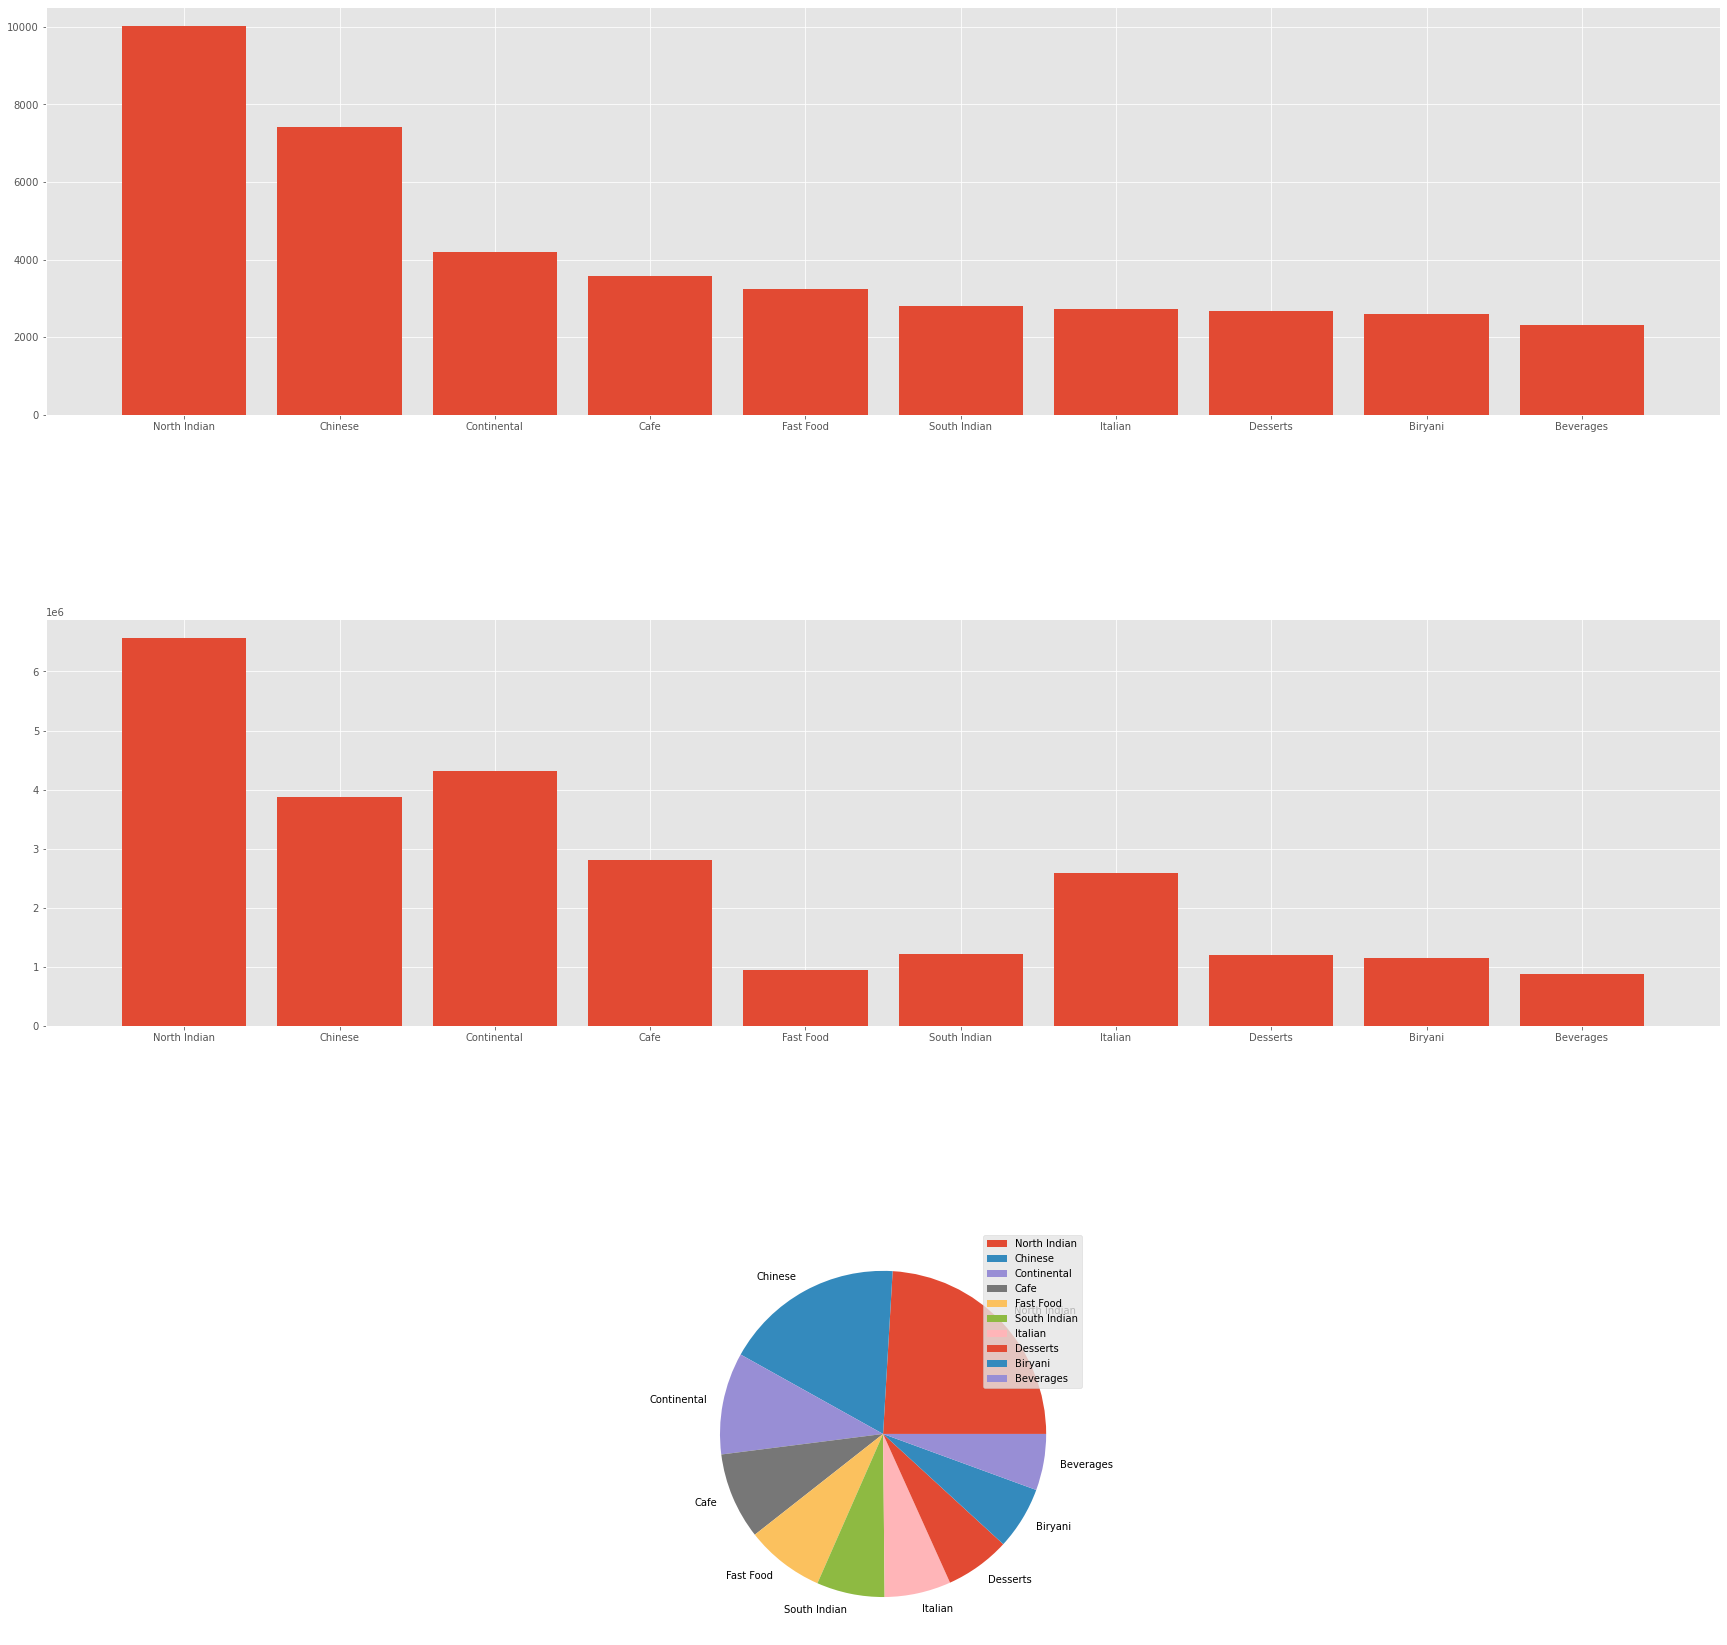

In [58]:
plt.figure (1, figsize = (30,30))

data_CuisineCount = cuisineCount.iloc[0:10, :]

plt.subplot(3,1,1)
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
plt.bar(data_CuisineCount['cuisines'], data_CuisineCount['count'], label = 'Count')

plt.subplot(3,1,2)
#plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
plt.bar(data_CuisineCount['cuisines'], dataVote, label = 'Votes')

plt.subplot(3,1,3)
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
plt.pie(x = data_CuisineCount['count'], labels = data_CuisineCount['cuisines'])

plt.legend()
plt.show()